In [ ]:
# Python 3 Compatibility
from __future__ import print_function, division
# Imports

# Classification Evaluation
If you head on over to the [`sklearn.metrics` module](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) you'll find a whole bunch of them for evaluating **Classification Models** like so:
<img src='img/class_metrics.png'/>

Today we're going to unpack **what** these things are, **why** we (might) need so many different ones, and **how** we might use them.  Let's go!

**Note**: You'll also see metrics for **Regression** and **Clustering Evaluation** in the `sklearn.metrics` package as well!

##### Definitions
- **Classification Metrics**: metrics for evaluating performance of classification models on a test set.
  - **Remember**: Like with Regression, these are what you use to choose the **best** model **for your context**.
- **Positive Class**: The class of interest, you specify!  Alternatively, "Class 1", if you will.
  - This has no meaning in multiclass classification.
- **Negative Class**: The remainder not in the positive class ("Class 0", often, tho maybe "Class -1").
  - This has no meaning in multiclass classification.

##### Comment on Multiclass vs Multilabel
- Some of these metrics work only on ***binary classification***, aka only 2 classes.
- Some work on ***multiclass classification***, aka more than 2 classes.
- Some also work on ***multilabel classification***, essentially where instances can have **multiple classes**.
- You can read more [here](http://scikit-learn.org/stable/modules/multiclass.html).
- For now, let's **focus on binary classification**.

## Examples of Classification Metrics

### The Confusion Matrix
- The **Confusion Matrix** is a table of the **actual classes** (ground truth) along the rows vs the **predicted classes** (from a model) along the columns
- In `sklearn.metrics`: `confusion_matrix`, or `classification_report` (indirectly)
- We can **derive most of our further classification metrics with quantities from the confusion matrix**
- For binary classification, it looks like this:
<img src='img/confusion.png'/>

Some comments:  
- Whoa!  That's a lot to take in, but it's actually not very complicated. 
- The only raw values are those in the cells marked **True Positive**, **False Negative**, **False Positive**, and **True Negative**.
- The rest of the values are derived from those 4 values.
- Here's an example, with those 4 values filled in:
<img src='img/confusion2.png'/>

Well that certainly feels less complicated.  Now let's step through each of the inner cells in the first table...

#### The Core Values:  

##### True Positives (TP)
- These are test instances whose **actual class** was **positive** and you **predicted positive**.
  - e.g.: 516 buyers you correctly predicted above
- Congrats you got these right!

##### False Negatives (FN)
- These are test instances whose **actual class** was **postive** and you **predicted negative**.
  - e.g.: 25 buyers you predicted as non-buyers above
- In **Classical Statistics** vernacular: **Type II Error**
  - You should've chosen the alternative hypothesis but you didn't
- You bum, you mucked these up!

##### False Positives (FP)
- These are test instances whose **actual class** was **negative** and you **predicted positive**.
  - e.g.: 10 non-buyers you predicted as buyers above
- In **Classical Statistics** vernacular: **Type I Error**
  - You chose the alternative hypothesis when you shouldn't have
- You bum, you mucked these up!

##### True Negatives (TN)
- These are test instances whose **actual class** was **positive** and you **predicted positive**.
  - e.g.: 725 buyers you correctly predicted above
- Congrats you got these right!

#### The Derived Fields:

##### Accuracy, our familiar friend
- The proportion of predictions you got right.
- The total **correct predictions divided by total predictions**.
- Formula:  
$$
\bbox[aqua, 8px]{
\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
}
$$
- e.g.: $\text{accuracy} = \frac{516 + 725}{516 + 725 + 10 + 25} = .973 \rightarrow 97.3\% \; \text{accuracy}$

##### Prevalence
- The proportion of instances with actual class positive.
- The instances with **actual class positive divided by the total number of instances**.
- Formula:
$$
\bbox[aqua, 8px]{
\text{prevalence} = \frac{TP + FN}{TP + TN + FP + FN}
}
$$
- e.g.: $\text{accuracy} = \frac{516 + 25}{516 + 725 + 10 + 25} = .424 \rightarrow 42.4\% \; \text{prevalence}$

##### True Positive Rate (TPR), Sensitivity, Hit Rate, Recall
- All mean the same thing.
- For instances with actual class positive, the proportion you predicted as positive.
  - In other words, the ***proportion of positives you caught*** with your model
- The instances you **correctly** predicted positive divided by the total number of actual positives.
- In `sklearn.metrics`: `recall_score`, or `precision_recall_fscore_support`
- Formula:
$$
\bbox[aqua, 8px]{
TPR = \text{Sensitivity} = \text{Hit Rate} = \text{Recall} = \frac{TP}{TP + FN}
}
$$
- e.g.: $TPR = \text{Sensitivity} = \text{Recall} = \frac{516}{516 + 25} = .954 \rightarrow 95.4\% \; \text{recall}$

##### Positive Predictive Value (PPV), Precision
- Both mean the same thing.
- For instances you predicted positive, the proportion that were actually positive.
  - In other words, for the ones you predicted positive, how accurate were you?
- The instances you **correctly** predicted positive divided by the total number of predicted positives.
- In `sklearn.metrics`: `precision_score`, or `precision_recall_fscore_support`
- Formula:
$$
\bbox[aqua, 8px]{
PPV = \text{Precision} = \frac{TP}{TP + FP}
}
$$
- e.g.: $PPV = \text{Precision} = \frac{516}{516 + 10} = .981 \rightarrow 98.1\% \; \text{precision}$

##### False Negative Rate (FNR), Miss Rate
- Both mean the same thing.
- Of the actual positives, the proportion that you got wrong.
  - In other words, the ***proportion of positives you missed*** with your model
- The instances you **incorrectly** predicted negative divided by the total number of actual positives.
- Formula:
$$
\bbox[aqua, 8px]{
\text{FNR} = \text{Miss Rate} = \frac{FN}{TP + FN} = 1-TPR
}
$$
- e.g.: $FNR = \frac{10}{516 + 25} = .046 \rightarrow 4.6\% \; \text{Miss Rate}$

##### True Negative Rate (TNR), Specificity (SPC)
- Both mean the same thing.
- Of the actual negatives, the proportion that you got right.
  - In other words, the ***proportion of negatives you filtered*** with your model
- The instances you **correctly** predicted negative divided by the total number of actual negatives.
- Formula:
$$
\bbox[aqua, 8px]{
TNR = \text{Specificity} = \frac{TN}{TN + FP}
}
$$
- e.g.: $TNR = \frac{725}{725 + 10} = .986 \rightarrow 98.6\% \; \text{Specificity}$

##### False Positive Rate (FPR), Fall-out
- Both mean the same thing.
- The proportion of instances with actual class negative and you predicted positive.
  - In other words, the ***proportion of negatives you caught*** with your model
- The instances you **incorrectly** predicted positive divided by the total number of actual negatives.
- Formula:
$$
\bbox[aqua, 8px]{
FPR = \text{Fall-out} = \frac{FP}{FP + TN} = 1-TNR = 1-SPC
}
$$
- e.g.: $FPR = \frac{10}{10 + 725} = .014 \rightarrow 1.4\% \; FPR$

##### False Discovery Rate (FDR)
- The proportion of instances with predicted class positive that were actually negative.
- The instances you **incorrectly** predicted positive divided by the total number of predicted positives.
- Formula:
$$
\bbox[aqua, 8px]{
FDR = \frac{FP}{TP + FP} = 1 - PPV
}
$$
- e.g.: $FDR = \frac{10}{516 + 10} = .019 \rightarrow 1.9\% \; FDR$

##### False Omission Rate (FOR)
- The proportion of instances with predicted class negative that were actually positive.
- The instances you **incorrectly** predicted negative divided by the total number of predicted negatives.
- Formula:
$$
\bbox[aqua, 8px]{
FOR = \frac{FN}{TN + FN}
}
$$
- e.g.: $FOR = \frac{25}{725 + 25} = .033 \rightarrow 3.3\% \; FOR$

##### Negative Predictive Value (NPV)
- The proportion of instances with predicted class negative that were actually negative.
  - In other words, for the ones you predicted negative, how accurate were you?
- The instances you **correctly** predicted negative divided by the total number of predicted negatives.
- Formula:
$$
\bbox[aqua, 8px]{
FOR = \frac{TN}{TN + FN} = 1 - FOR
}
$$
- e.g.: $FOR = \frac{725}{725 + 25} = .967 \rightarrow 96.7\% \; NPV$

#### And some more!

##### F$_1$ and F$_\beta$ Scores
- Weighted Averages (harmonic mean) of Precision and Recall
  - In other words, for **balancing precision vs recall**
- $\beta=1 \rightarrow F_\beta = F_1$
- In `sklearn.metrics`: `f1_score` and `fbeta_score`, or `precision_recall_fscore_support`
- Formulae:
$$
\bbox[aqua, 8px]{
F_1 = 2\frac{\text{precision}\times\text{recall}}{\text{precision} + \text{recall}}
}
$$
$$
\bbox[aqua, 8px]{
F_\beta = (1+\beta^2)\frac{\text{precision}\times\text{recall}}{\beta^2\text{precision} + \text{recall}}
}
$$
- e.g.: $F_1 = 2\frac{.981\cdot.954}{.981 + .954} = .967$

##### Hamming Loss
- Essentially, the proportion of incorrect labels
- Reduces to $1-\text{accuracy}$ unless we have a multilabel problem
- **Just use accuracy**
- In `sklearn.metrics`: `hamming_loss`
- Formula:
$$
\bbox[aqua, 8px]{
L_{Hamming}(y, \hat{y}) = \frac{1}{n_{labels}}\sum\limits_{j=0}^{n_{labels}-1}1 \text{if} \; (\hat{y}_j \ne y_j)
}
$$

##### Jaccard Similarity
- Computes the **average Jaccard Similarity, J** between predicted and actual across all test samples
  - Jaccard for one sample is intersection over union: $J(y_i, \hat{y}_i) = \frac{y_i \cap \hat{y}_i}{y_i \cup \hat{y}_i}$
- Reduces to accuracy unless we have a multilabel problem
- **Just use accuracy**.
- In `sklearn.metrics`: `jaccard_similarity_score`

##### Hinge Loss
- Computes the average distance of the model from the data.
- Used for margin classifiers like SVM.
- Only considers errors, and how far away they are from being right (aka how far are they on the wrong side of the margin)
  - Averages these values.
- In `sklearn.metrics`: `hinge_loss`
  
##### Log Loss
- Used for evaluating **Probabilistic Classifiers**.
- A measure of how far off your model is taking into account estimated probabilities.
- Computes **average negative log-likelihood** of the samples given your classifier, C.
- In `sklearn.metrics`: `log_loss`
- Formula:
$$
\bbox[aqua, 8px]{
L_{log}(y, C) = -\sum\limits_{y_1}^{y_n}\ln{P(y_{i, actual}|C)}
}
$$
- e.g.:
`
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred)
0.1738...
`
  - $L_{log} = -\left(\ln{.9} + \ln{.8} + \ln{.7} + \ln{.99}\right) = .1738$
  
##### Matthews Correlation Coefficient (MCC)
- Used for **Binary Classification**.
- Essentially a **correlation coefficient** (a la $r^2$ for Classification problems).
  - i.e. ranges from -1 to 1
- Resistant to problems with **imbalanced classes**.
- In `sklearn.metrics`: `matthews_corrcoef`
- Formula:
$$
\bbox[aqua, 8px]{
MCC = \frac{TP\times TN - FP\times FN}{\sqrt{(TP+FP)(TP + FN)(TN + FP)(TN + FN)}}
}
$$

##### Cohen's Kappa Statistic
- Used for comparing differences between 2 human-annotated ground truth sets.
  - So...skip it!
  
##### Zero-One Loss
- Essentially the same as Hamming Loss, except it's stricter for multilabel problems.
- It assigns a loss of 1 if all the labels on a sample aren't perfect.
- Just use accuracy.

##### Receiver Operating Characteristic (ROC) Curves
- Plots **True Positive Rate (TPR), aka Recall** against **False Positive Rate (FPR), aka Fall-out** across **different model thresholds**.
  - Threshold example: Cutoff probability in Logistic Regression.
- **High threshold** will be very discerning $\rightarrow$ **low FPR**.
- **High threshold** might also toss out True Positives $\rightarrow$ **low TPR**.
- **Low threshold** isn't very discerning $\rightarrow$ **high FPR**.
- **Low threshold** retrieves most of the true positives $\rightarrow$ **high TPR**.
- We want a model that has **High TPR** and **Low FPR**.
- **Good predictive model** $\rightarrow$ **sharp divide** (at some threshold) between true and false positives.
  - This means the ROC curve will jump dramatically at the proper threshold.
- **Bad predictive model** $\rightarrow$ **TPR and FPR increase steadily together** as threshold is decreased.
  - This means the classification boundary is blurred, essentially.

ROC Curves are ubiquitous, and can be a bit confusing at first.  So let's do an example in `sklearn` with some fake data!  (p.s. you should really love fake data, it's awesome I swear).

### ROC Curve in `sklearn`
Here's how you do it on some fake data:

FPR:[ 0.   0.5  0.5  1. ]
TPR:[ 0.5  0.5  1.   1. ]
Thresholds:[ 0.8   0.4   0.35  0.1 ]


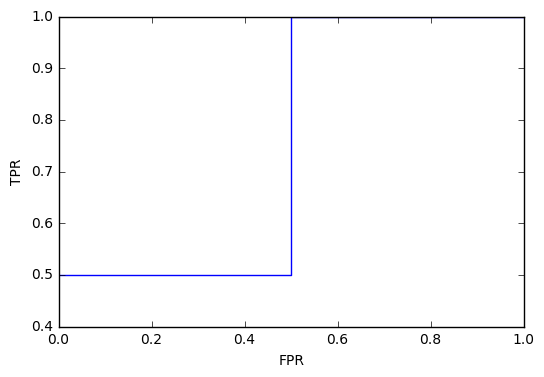

In [5]:
import numpy as np
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
%matplotlib inline
# Generate Sample actual values
y = np.array([1, 1, 2, 2])
# Generate predicted probabilities for class 2 (e.g. they came from some algorithm, like logistic regression)
scores = np.array([0.1, 0.4, 0.35, 0.8])
# Use roc_curve to return the TPR and FPR rates at various thresholds
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
print('FPR:' + str(fpr))
print('TPR:' + str(tpr))
print('Thresholds:' + str(thresholds))
# Plot our ROC curve!
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

**So what happened here?**
- At a threshold of 0.8, we are able to grab 1 of the 2 Class 2 examples, with no false positives.
- At a threshold of 0.4, we now mistakenly grab the 2nd Class 1 example, spiking our FPR and leaving TPR the same.
- At a threshold of 0.35, we now have both Class 2 examples to get our TPR (recall) up to 1.
- At a threshold of 0.1, we classify everything as class 2 and thus spike our FPR again.

**A more interesting example**:  
Here's an ROC curve for the Iris Dataset:

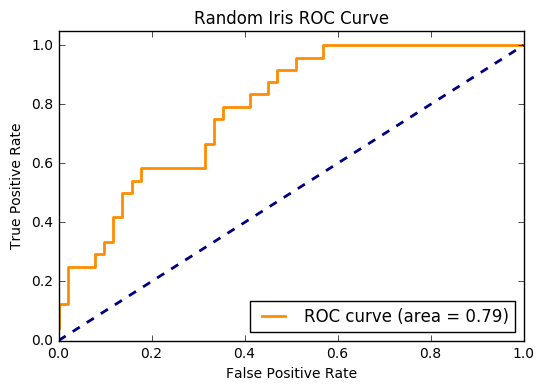

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import the iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
# This makes y 3 columns with dummy variables, rather than one with 0, 1, 2
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# We are using ravel to flatten the classes and predicted scores over all classes into 1 big list
# This is called "microaveraging", we're averaging over all the individual datapoints and class options
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Iris ROC Curve')
plt.legend(loc="lower right")
plt.show()

Well that looks prettier!

**Things to note:**  
- The ROC curve rises more rapidly than the line TPR = FPR.
- A random guess classifier would conform to the dashed line TPR = FPR.
- A **perfect** ROC curve would shoot straight up to TPR=1.0 while FPR=0.0, forming a plot that looks like a right angle.
  - The closer our curve is to that ideal right angle, the better our model is.
  
##### Area Under the Curve (AUC) for ROC Curves
You'll see I introduced someting else in the code, a call to `auc()`.  Here's the deal with that:
- The area under that "perfect right angle" ROC curve (AUC) would be 1.0 in our plot.
- All other ROC curves will have $AUC \lt 1.0$
- Thus, $AUC$ can be another measure of model performance!
- In `sklearn.metrics`: `auc`, or `roc_auc_score` (if you don't do the ROC explicitly first)

## Why do we need all these??!!
Phew!!  We've seen a whole bunch of different metrics for classification!

**So now the important question, why do we need to care?  Why so many metrics!!??**  

### Motivating with an Example
- Consider a classifier that predicts from a routine check-up the probability of a patient having a rare disease called Paulitis which, if not caught early leads to a slow, painful death.  
<img src='img/paul.jpg' style='height:400px; display:inline-block'/>
<img src='img/doc.jpg' style='height:400px; display:inline-block'/>
- Paulitis affects only 1% of the general population.
- Your training set reflects this: **1% of training examples are positive for Paulitis**.
- You run a model on a whole host of patient attributes, and are excited to test it out...

##### Question: What could go wrong here?


#### The Model
- You build some sort of **Bayesian classifier** that will only report patients as likely having Paulitis if the model predicts a probability greater than your **chosen threshold of 0.50**.
- Well, you **cross-validate your model** like the good data scientist you are and are overjoyed to report that you've **attained 99% accuracy!**
- Should you start selling your secret screening process to doctors looking to catch Paulitis before it starts patients on that tortuous path?
- Hmm, this seems like a trap...

#### Re-Examining our Model
- You examine your model's predictions and make a startling discovery...
- **Your model is predicting no disease for every single patient!**
- You'll never catch any instances of that awful Paulitis!

##### But how?  We cross-validated!
Simply put:
***Accuracy is often not the best evaluation metric!!!***
- Especially when you have **Imbalanced Classes**
- **Imbalanced Classes**: when there is a significantly different number of one class from another in a classification problem.
  - Here there are 99 times the amount of negative patients as positive!
<img src='img/paulitis.png'/>

#### Why Accuracy Sucks (sometimes)
- Don't believe me that accuracy is misleading?  Here, let's examine some of our other metrics:
- **TNR aka Specificity**: $TNR = SPC = (TN)/(TN+FP)=100/(100+0) = 1.0$
  - Well that looks great to me!
- **False Discovery Rate**: $FDR = (FP)/(FP + TP) = 0/(0 + 1) = 0.0$
  - Still looking good!
- **TPR** aka **Recall**: $\text{Recall} = (TP)/(TP + FN) = 0/(0 + 1) = 0.0$
  - Oh no...oh bad bad bad...
  - This means of all the patients out there about to die of Paulitis, we'll save none of them!
  
##### Question
What's worse?
- **Option A**: 
  - You are told after your routine screening that the model suggests you have Paulitis.
  - You undergo a whole day of thorough testing to ultimately find out the model was wrong, you don't have it.
  - What type of error (Type I/II) is this?
- **Option B**:
  - The model decides you don't have Paulitis, and you're sent home following your routine check-up.
  - It turns out you did have Paulitis, and a short time later you die cold and alone of this awful disease, wishing you'd taken up a career in Data Science.
  - What type of error (Type I/II) is this?
  
##### What should you do?
Lower the threshold!  Lower it to the point where you're actually doing some good in the world!

### The Moral of the Story
- **The classification metric you choose matters**.
- The classification metric you choose **should be context specific**.
  - e.g.: In marketing maybe favor recall over precision.  The cost of sending out a few extra emails is trivial, and you just want to catch as many potential customers as you can.
  - e.g.: In Spam detection favor precision.  The cost of missing an important email in the Spam folder is probably far greater than the cost of getting a few extra junk emails.

## Coding Tips/Tricks for Model Evaluation



### Different Ways to Score
There are 3 different ways you can score your models in `sklearn`:
1. Estimator-specific scoring functions using `score()`
2. External scorers
3. Functions in the `sklearn.metrics` package

Let's take a quick look at these:

#### Estimator-Specific Scoring Function
- We've used these the most already!
- Use the `score()` method for any given `estimator` object
- e.g.:  
`lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)`

#### External Scoring Functions
- You can pass specific **scorers** to functions like `model_selection.cross_val_score` or `GridSearchCV`
- You can even create your own scorers!

#### The Metrics Package
- Well we just went through all of these!